# Part 1. Classifier Training

## Reading data for classifier training

In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob

vehicles = glob.glob('training_data/vehicles/**/*.png', recursive=True)
non_vehicles = glob.glob('training_data/non-vehicles/**/*.png', recursive=True)

# Read the data
cars = []
noncars = []
for fname in vehicles:
    cars.append(cv2.imread(fname))
for fname in non_vehicles:
    noncars.append(cv2.imread(fname))

## Data statistics and visualization

Cars data count:  8792
Non cars data count:  8968
Image shape:  (64, 64, 3)
Image type:  uint8


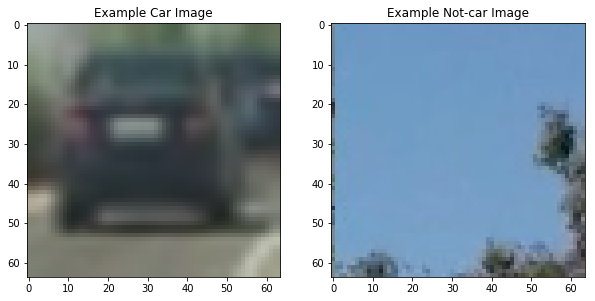

In [2]:
# We have 8792 cars and 8968 non-cars, the data is balanced
print("Cars data count: ", len(vehicles))
print("Non cars data count: ", len(non_vehicles))
print("Image shape: ", str(cars[0].shape))
print("Image type: ", str(cars[0].dtype))

# Plot the examples
fig = plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(cv2.cvtColor(cars[0], cv2.COLOR_BGR2RGB))
plt.title('Example Car Image')
plt.subplot(122)
plt.imshow(cv2.cvtColor(noncars[0], cv2.COLOR_BGR2RGB))
plt.title('Example Not-car Image')
plt.show()

## Feature Extraction

In [3]:
# Takes an image, returns an image with a converted color space
def convert_BGR_cspace (image, cspace='RGB'):
    if cspace == 'RGB':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    elif cspace == 'HSV':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    elif cspace == 'LUV':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2LUV)
    elif cspace == 'HLS':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HLS)
    elif cspace == 'YUV':
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    elif cspace == 'YCrCb': 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2YCrCb)
    elif cspace == 'GRAY':    
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image
def convert_RGB_cspace (image, cspace='RGB'):
    if cspace == 'HSV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    elif cspace == 'LUV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
    elif cspace == 'HLS':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
    elif cspace == 'YUV':
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
    elif cspace == 'YCrCb': 
        image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    elif cspace == 'GRAY':    
        image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    return image

### Color Histogram Features

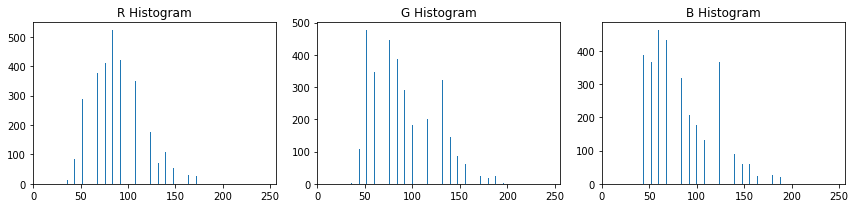

In [4]:
# Define a function to compute color histogram features  
def get_color_hist_features(img, nbins=32, bins_range=(0, 256), debug=False):
    # img scale is 0-255
    # Compute the histogram of the RGB channels separately
    rhist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    ghist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    bhist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    # Generating bin centers
    bin_edges = rhist[1]
    bin_centers = (bin_edges[1:]  + bin_edges[0:len(bin_edges)-1])/2
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((rhist[0], ghist[0], bhist[0]))
    if (debug==True):
        # Return the individual histograms, bin_centers and feature vector
        return rhist, ghist, bhist, bin_centers, hist_features
    else:
        return hist_features

rh, gh, bh, bincen, feature_vec = get_color_hist_features(cars[0], nbins=32, bins_range=(0, 256), debug=True)

# Plot a figure with all three bar charts
if rh is not None:
    fig = plt.figure(figsize=(12,3))
    plt.subplot(131)
    plt.bar(bincen, rh[0])
    plt.xlim(0, 256)
    plt.title('R Histogram')
    plt.subplot(132)
    plt.bar(bincen, gh[0])
    plt.xlim(0, 256)
    plt.title('G Histogram')
    plt.subplot(133)
    plt.bar(bincen, bh[0])
    plt.xlim(0, 256)
    plt.title('B Histogram')
    fig.tight_layout()
    plt.show()
else:
    print ("rh is None")

### Spatial binning features

In [5]:
# spatial binning features
# Define a function to compute binned color features  
def get_bin_spatial_features(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

### Hog features

In [6]:
from skimage.feature import hog

# hog features
# Define a function to return HOG features and visualization
def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False, feature_vec=True):
    # Call with two outputs if vis==True
    if vis == True:
        features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                                  cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                                  visualise=vis, feature_vector=feature_vec)
        return features, hog_image
    # Otherwise call with one output
    else:      
        features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                       cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True, 
                       visualise=vis, feature_vector=feature_vec)
        return features

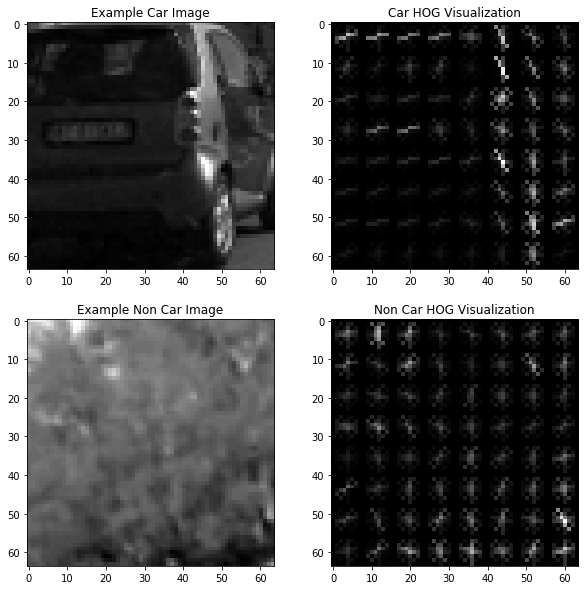

In [7]:
# visualize hog features

# Generate a random index to look at a car image
ind = np.random.randint(0, len(cars))
cargs = cv2.cvtColor(cars[ind], cv2.COLOR_BGR2GRAY)
ind = np.random.randint(0, len(noncars))
noncargs = cv2.cvtColor(noncars[ind], cv2.COLOR_BGR2GRAY)

# Define HOG parameters
orient = 9
pix_per_cell = 8
cell_per_block = 2
# Call our function with vis=True to see an image output
features1, hog_image1 = get_hog_features(cargs, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)
features2, hog_image2 = get_hog_features(noncargs, orient, 
                            pix_per_cell, cell_per_block, 
                            vis=True, feature_vec=False)
# Plot the examples
fig = plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(cargs, cmap='gray')
plt.title('Example Car Image')
plt.subplot(222)
plt.imshow(hog_image1, cmap='gray')
plt.title('Car HOG Visualization')
plt.subplot(223)
plt.imshow(noncargs, cmap='gray')
plt.title('Example Non Car Image')
plt.subplot(224)
plt.imshow(hog_image2, cmap='gray')
plt.title('Non Car HOG Visualization')
plt.show()

### Extract features from a single image

In [8]:
# Define a function to extract features from a single image
def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
                        hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0,
                        spatial_feat=True, hist_feat=True, hog_feat=True):  
    #1) Color Space Conversion
    # For HOG features
    gray = convert_BGR_cspace (img, cspace='GRAY')
    # For color hist and spatial binning features
    feature_image = convert_BGR_cspace (img, cspace=color_space)
    
    #2) Define an empty list to receive features
    img_features = []

    #3) Compute spatial features if flag is set
    if spatial_feat == True:
        spatial_features = get_bin_spatial_features(feature_image, size=spatial_size)
        #4) Append features to list
        img_features.append(spatial_features)
    #5) Compute histogram features if flag is set
    if hist_feat == True:
        hist_features = get_color_hist_features(feature_image, nbins=hist_bins)
        #6) Append features to list
        img_features.append(hist_features)
    #7) Compute HOG features if flag is set
    if hog_feat == True:
        if hog_channel == 'ALL':
            hog_features = []
            for channel in range(feature_image.shape[2]):
                hog_features.extend(get_hog_features(feature_image[:,:,channel], 
                                    orient, pix_per_cell, cell_per_block, 
                                    vis=False, feature_vec=True))      
        else:
            hog_features = get_hog_features(gray,#feature_image[:,:,hog_channel], 
                                            orient, 
                                            pix_per_cell, cell_per_block, vis=False, feature_vec=True)
        #8) Append features to list
        img_features.append(hog_features)
    #9) Return concatenated array of features
    return np.concatenate(img_features)

In [9]:
ind = np.random.randint(0, len(cars))
img = cars[ind]

feat = single_img_features(img, color_space='RGB', spatial_size=(16, 16),
                           hist_bins=16, orient=9, 
                           pix_per_cell=8, cell_per_block=2, hog_channel=0,
                           spatial_feat=True, hist_feat=True, hog_feat=True)

### Extract features from a list of images

In [10]:
# Extract features from a list of images
def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
                     hist_bins=32, orient=9, pix_per_cell=8, 
                     cell_per_block=2, hog_channel=0,
                     spatial_feat=True, hist_feat=True, hog_feat=True):
    features = []
    # Iterate through the list of images
    for img in imgs:
        img_features = single_img_features(img, color_space, spatial_size,
                                           hist_bins, orient, pix_per_cell,
                                           cell_per_block, hog_channel,
                                           spatial_feat, hist_feat, hog_feat)
        features.append(img_features)
    return features

## Parameter to train the classifier

In [11]:
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb

# HOG params
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"

# Bin spatial param
spatial_size = (16, 16) # Spatial binning dimensions

# Color histogram param
hist_bins = 16    # Number of histogram bins

spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [None, None] # Min and max in y to search in slide_window()

## Training

In [12]:
from sklearn.preprocessing import StandardScaler

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
noncar_features = extract_features(noncars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, noncar_features)).astype(np.float64)                        
# Normalize    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Apply the scaler to X
scaled_X = X_scaler.transform(X)
# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(noncar_features))))

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import time
import pickle
from sklearn.svm import SVC
from sklearn import grid_search

# With Parameter tuning
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svr = SVC()
clf = grid_search.GridSearchCV(svr, parameters)

t=time.time()
clf.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()
n_predict = 10
print('My SVC predicts: ', clf.predict(X_test[0:n_predict]))
print('For these',n_predict, 'labels: ', y_test[0:n_predict])
t2 = time.time()
print(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')

# Save the classifier
with open('clf_YCC_pickle.p', 'wb') as f:
    pickle.dump(clf, f)


/home/osboxes/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/osboxes/miniconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


"\n# With Parameter tuning\nparameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}\nsvr = SVC()\nclf = grid_search.GridSearchCV(svr, parameters)\n\nt=time.time()\nclf.fit(X_train, y_train)\nt2 = time.time()\nprint(round(t2-t, 2), 'Seconds to train SVC...')\n# Check the score of the SVC\nprint('Test Accuracy of SVC = ', round(clf.score(X_test, y_test), 4))\n# Check the prediction time for a single sample\nt=time.time()\nn_predict = 10\nprint('My SVC predicts: ', clf.predict(X_test[0:n_predict]))\nprint('For these',n_predict, 'labels: ', y_test[0:n_predict])\nt2 = time.time()\nprint(round(t2-t, 5), 'Seconds to predict', n_predict,'labels with SVC')\n\n# Save the classifier\nwith open('clf_YCC_pickle.p', 'wb') as f:\n    pickle.dump(clf, f)\n"

In [14]:
# Load the trained classifier
clf_YCC = pickle.load(open('clf_YCC_pickle.p', 'rb'))

# Part 2. Vehicle Detection on an Image

## Helper functions to group intersecting rectangles together

In [15]:
def intersects(box1, box2):
    # box1[0][0], box1[0][1] is the top left
    # box1[1][0], box1[1][1] is the bottom right
    # box1[1][0], box1[0][1] is the top right
    # box1[0][0], box1[1][1] is the bottom left
    not_intersects = box1[1][0] < box2[0][0] or box1[0][0] > box2[1][0] or box1[0][1] > box2[1][1] or box1[1][1] < box2[0][1]
    return not not_intersects

# Test ((828, 400), (924, 496)), ((972, 400), (1068, 496)), ((1044, 400), (1140, 496))
box1 = ((972, 400), (1068, 496))
box2 = ((1044, 400), (1140, 496))
box3 = ((828, 400), (924, 496))
print("Intersects(True): ", intersects(box1, box2))
print("Intersects(False): ", intersects(box1, box3))

# Takes a list of rectangle coordinates (top_left,bot_right) like this:
# [((828, 400), (924, 496)), ((972, 400), (1068, 496)), ((1044, 400), (1140, 496))]
# group the intersecting rectangles and draw outer bounding box for the intersecting rectangles
# Returns a list of rectangle coordinates 
def group_windows (windows):
    if (len(windows)<2):
        return windows
    # Get the outer bounding box
    window_list = []
    i = 0
    for window1 in windows:
        for window2 in windows[i+1:]:
            if (intersects(window1, window2)):
                # Check other list
                found = False
                for item in window_list:
                    if ((window1 in item) and (window2 in item)):
                        found = True
                    elif (window1 in item):
                        found = True
                        item.append(window2)
                    elif (window2 in item):
                        found = True
                        item.append(window1)
                    if (found):
                        break
                if (not found):
                    tmp = []
                    tmp.append(window1)
                    tmp.append(window2)
                    window_list.append(tmp)
            else:
                found = False
                for item in window_list:
                    if (window1 in item):
                        found = True
                        break
                if (not found):    
                    tmp = []
                    tmp.append(window1)
                    window_list.append(tmp)
        i=i+1
    window_list2 = []
    for windows in window_list:
        if (len(windows)<2):
            window_list2.append(windows[0])
        else:
            min_x = 2000
            min_y = 2000
            max_x = 0
            max_y = 0
            for w in windows:
                maxx = max(w[0][0], w[1][0])
                maxy = max(w[0][1], w[1][1])
                minx = min(w[0][0], w[1][0])
                miny = min(w[0][1], w[1][1])
                if (max_x<maxx):
                    max_x = maxx
                if (max_y<maxy):
                    max_y = maxy
                if (min_y>miny):
                    min_y = miny
                if (min_x>minx):
                    min_x = minx
            top_left = (min_x,min_y)
            bot_right = (max_x, max_y)
            window_list2.append((top_left,bot_right))
    return window_list2

windows = [((288, 436), (384, 532)), ((360, 400), (456, 496)), ((828, 400), (924, 496)), ((936, 400), (1032, 496)), ((972, 400), (1068, 496)), ((1044, 400), (1140, 496)), ((1044, 436), (1140, 532)), ((1116, 400), (1212, 496)), ((1152, 400), (1248, 496)), ((1152, 436), (1248, 532))]
#windows = [((828, 400), (924, 496)), ((972, 400), (1068, 496)), ((1044, 400), (1140, 496))]
windows = [((288, 436), (384, 532))]
wl = group_windows (windows)
print(wl)

Intersects(True):  True
Intersects(False):  False
[((288, 436), (384, 532))]


## Heatmap functions

In [16]:
def add_heat(heatmap, bbox_list):
    # Iterate through list of bboxes
    for box in bbox_list:
        # Add += 1 for all pixels inside each bbox
        # Assuming each "box" takes the form ((x1, y1), (x2, y2))
        heatmap[box[0][1]:box[1][1], box[0][0]:box[1][0]] += 1
    # Return updated heatmap
    return heatmap

def apply_threshold(heatmap, threshold):
    # Zero out pixels below the threshold
    heatmap[heatmap < threshold] = 0
    # Return thresholded map
    return heatmap

def draw_labeled_bboxes(img, labels):
    # Iterate through all detected cars
    for car_number in range(1, labels[1]+1):
        # Find pixels with each car_number label value
        nonzero = (labels[0] == car_number).nonzero()
        # Identify x and y values of those pixels
        nonzeroy = np.array(nonzero[0])
        nonzerox = np.array(nonzero[1])        
        minx = np.min(nonzerox)
        miny = np.min(nonzeroy)
        maxx = np.max(nonzerox)
        maxy = np.max(nonzeroy)
        width = (maxx-minx)
        height = (maxy-miny)
        ratio = width/height
        # Define a bounding box based on min/max x and y
        bbox = ((minx, miny), (maxx, maxy))
        # Draw the box on the image
        cv2.rectangle(img, bbox[0], bbox[1], (0,0,255), 6)
    # Return the image
    return img

## Pipeline function

In [17]:
# Define a class to receive the characteristics of each vehicle detection
from collections import deque

class VDTracker():
    def __init__(self):
        # num frames to keep
        self.n = 5
        # threshold
        self.threshold = 5
        # a deque of windows list
        self.windows_list = deque()
        # heatmap
        self.heatmap = None
        # heat
        self.heat = None
        # labels
        self.labels = None
        # sample img
        self.img = None
        
    def init_heatmap(self, img):
        self.img = img
        self.heatmap = np.zeros_like(img[:,:,0]).astype(np.float)
        self.heat = np.zeros_like(img[:,:,0]).astype(np.float)
        
    def update_heatmap(self, windows):
        if (len(self.windows_list) == self.n):
            self.windows_list.popleft()
        self.windows_list.append(windows)
        # Reset heatmap
        self.heat = np.zeros_like(self.img[:,:,0]).astype(np.float)
        for item in self.windows_list:
            wl = []
            for i in item:
                wl.append(i)
            windows = group_windows(wl) 
            self.heat = add_heat(self.heat, windows)
        # Apply threshold to help remove false positives
        self.heat = apply_threshold(self.heat, self.threshold)
        # Visualize the heatmap when displaying    
        self.heatmap = np.clip(self.heat, 0, 255)
        # Find final boxes from heatmap using label function
        self.labels = label(self.heatmap)

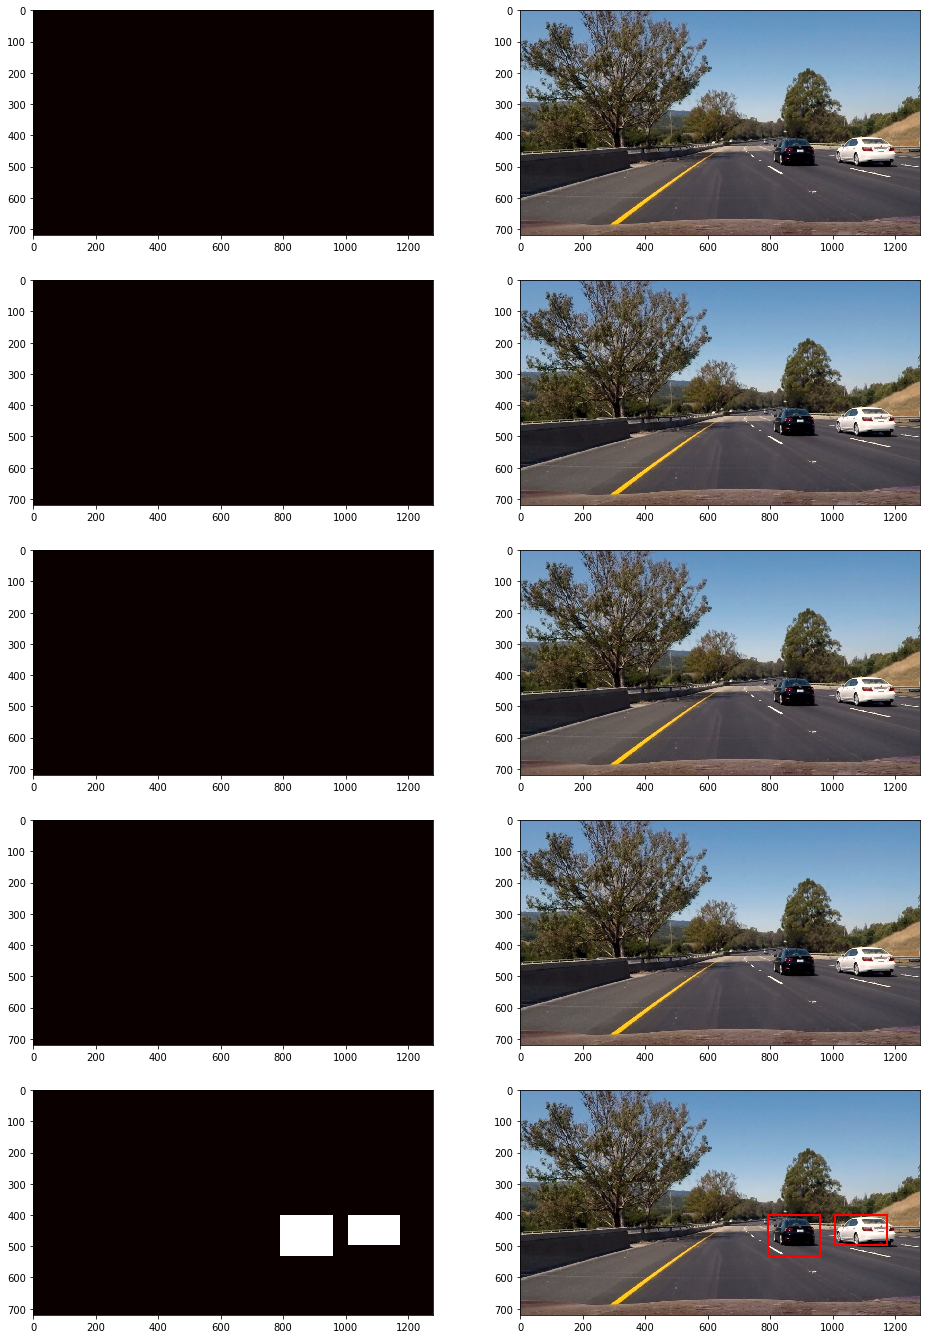

In [18]:
# Load the trained classifier
#clf = pickle.load(open('clf_pickle.p', 'rb'))
# Read test image 
from scipy.ndimage.measurements import label

img = cv2.imread('test_images/test6.jpg')
F = VDTracker()
F.init_heatmap(img)
ystart = 400
ystop = 680
scales = [1.5]

def pipeline(img):
    draw_img = np.copy(img)
    window_list = []
    for scale in scales:
        windows = get_hot_windows (img, ystart, ystop, 
                                   scale, clf_YCC, X_scaler, 
                                   orient, pix_per_cell, cell_per_block, 
                                   spatial_size, hist_bins)
        window_list += windows
        
    F.update_heatmap(window_list)
    draw_img = draw_labeled_bboxes(np.copy(img), F.labels)
    return draw_img   
    
def find_cars (img, ystart, ystop, 
               svc, X_scaler, 
               orient, pix_per_cell, cell_per_block, 
               spatial_size, hist_bins):
    draw_img = np.copy(img)
    heat = np.zeros_like(img[:,:,0]).astype(np.float)  
    scales = [1.5]
    window_list = []
    for scale in scales:
        windows = get_hot_windows (img, ystart, ystop, 
                                   scale, svc, X_scaler, 
                                   orient, pix_per_cell, cell_per_block, 
                                   spatial_size, hist_bins, "BGR")
        window_list += windows    
    #for window in window_list:
    #    cv2.rectangle(draw_img,(window[0][0],window[0][1]),(window[1][0],window[1][1]),(0,0,255),6)  
    #return convert_BGR_cspace(draw_img)
    F.update_heatmap(window_list)
    if (F.n == len(F.windows_list)):
        draw_img = draw_labeled_bboxes(np.copy(img), F.labels)
    return convert_BGR_cspace(draw_img), F.heatmap

# Define a single function that can extract features using hog sub-sampling and make predictions
def get_hot_windows (img, ystart, ystop, 
                     scale, svc, X_scaler, 
                     orient, pix_per_cell, cell_per_block, 
                     spatial_size, hist_bins, cspace="RGB"):
    # Copy img
    draw_img = np.copy(img)
    
    # For HOG features
    if (cspace == "RGB"):
        gray = convert_RGB_cspace (img, cspace='GRAY')
    else:
        gray = convert_BGR_cspace (img, cspace='GRAY')

    # For other features
    if (cspace == "RGB"):
        img = convert_RGB_cspace (img, cspace='YCrCb')
    else:
        img = convert_BGR_cspace (img, cspace='YCrCb')
    
    # Crop the image
    gray_tosearch = gray[ystart:ystop,:]   
    ctrans_tosearch = img[ystart:ystop,:,:]
    
    # Scale the image
    imshape = ctrans_tosearch.shape 
    grshape = gray_tosearch.shape
    
    ctrans_tosearch = cv2.resize(ctrans_tosearch, (np.int(imshape[1]/scale), np.int(imshape[0]/scale)))
    gray_tosearch = cv2.resize(gray_tosearch, (np.int(grshape[1]/scale), np.int(grshape[0]/scale)))
        
    ch1 = ctrans_tosearch[:,:,0]

    # Define blocks and steps as above
    nxblocks = ((ch1.shape[1]) // pix_per_cell)
    nyblocks = (ch1.shape[0] // pix_per_cell)
    nfeat_per_block = orient*cell_per_block**2
    # 64 was the orginal sampling rate, with 8 cells and 8 pix per cell
    window = 64
    nblocks_per_window = (window // pix_per_cell)-1 
    cells_per_step = 3 # Instead of overlap, define how many cells to step
    nxsteps = (nxblocks - nblocks_per_window) // cells_per_step
    nysteps = (nyblocks - nblocks_per_window) // cells_per_step
    
    # Compute individual channel HOG features for the entire image
    hog = get_hog_features(gray_tosearch, orient, pix_per_cell, cell_per_block, feature_vec=False)
  
    window_list = []
    for xb in range(nxsteps):
        for yb in range(nysteps):
            ypos = yb*cells_per_step 
            xpos = xb*cells_per_step
            
            # Extract HOG for this patch
            hog_features = hog[ypos:ypos+nblocks_per_window, xpos:xpos+nblocks_per_window].ravel() 
        
            xleft = xpos*pix_per_cell
            ytop = ypos*pix_per_cell
        
            # Extract the image patch
            subimg = cv2.resize(ctrans_tosearch[ytop:ytop+window, xleft:xleft+window], (64,64))
          
            # Get color features
            spatial_features = get_bin_spatial_features(subimg, size=spatial_size)
            hist_features = get_color_hist_features(subimg, nbins=hist_bins)

            # Scale features and make a prediction
            test_features = X_scaler.transform(np.hstack((spatial_features, hist_features, hog_features)).reshape(1, -1))    
            test_prediction = svc.predict(test_features)
            
            if test_prediction == 1:            
                xbox_left = np.int(xleft*scale)
                ytop_draw = np.int(ytop*scale)
                win_draw = np.int(window*scale)
                window_list.append(((xbox_left, ytop_draw+ystart),(xbox_left+win_draw,ytop_draw+win_draw+ystart)))
    
    return window_list            
    
img1 = cv2.imread('test_images/test6.jpg')
img2 = cv2.imread('test_images/test6.jpg')
img3 = cv2.imread('test_images/test6.jpg')
img4 = cv2.imread('test_images/test6.jpg')
img5 = cv2.imread('test_images/test6.jpg')
img6 = cv2.imread('test_images/test6.jpg')
img5 = cv2.imread('test_images/test6.jpg')
img6 = cv2.imread('test_images/test6.jpg')

out_img1, hm1 = find_cars(img1, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img2, hm2 = find_cars(img2, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img3, hm3 = find_cars(img3, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img4, hm4 = find_cars(img4, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img5, hm5 = find_cars(img5, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img6, hm6 = find_cars(img6, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img7, hm7 = find_cars(img5, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)
out_img8, hm8 = find_cars(img6, ystart, ystop, clf_YCC, X_scaler, orient, pix_per_cell, cell_per_block, spatial_size, hist_bins)

plt.figure(figsize=(16,24))
plt.subplot(521)
plt.imshow(hm1, cmap='hot')
plt.subplot(522)
plt.imshow(out_img1)
plt.subplot(523)
plt.imshow(hm2, cmap='hot')
plt.subplot(524)
plt.imshow(out_img2)
plt.subplot(525)
plt.imshow(hm3, cmap='hot')
plt.subplot(526)
plt.imshow(out_img3)
plt.subplot(527)
plt.imshow(hm4, cmap='hot')
plt.subplot(528)
plt.imshow(out_img4)
plt.subplot(529)
plt.imshow(hm5, cmap='hot')
plt.subplot(5,2,10)
plt.imshow(out_img5)
plt.show()

In [19]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
def process_image(image):
    result = pipeline(image)
    return result

In [ ]:
img = cv2.imread('test_images/test6.jpg')
F = VDTracker()
F.init_heatmap(img)
video_output = 'project_video_out.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image) #NOTE: this function expects color images!!
%time white_clip.write_videofile(video_output, audio=False)

In [ ]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML
video_output = 'project_video_out.mp4'
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(video_output))